In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from get_aq_data import get_flo_data, ID_to_name

In [3]:
data, hourly_mean, daily_mean = get_flo_data()

In [4]:
all_site_daily_mean = daily_mean.mean(axis=1)

In [5]:
lwts = pd.read_csv('../Data/Weather/20CR_1871-1947_ncep_1948-2019_12hrs_UK.csv', parse_dates=[[0, 1, 2]], dayfirst=True)

In [6]:
lwts = lwts.rename(columns={'day_ month_ year': 'timestamp', ' LWT': 'LWT'})

In [7]:
lwts.index = pd.DatetimeIndex(lwts.timestamp)

In [8]:
lwts = lwts['LWT']

In [9]:
merged = pd.merge(all_site_daily_mean.rename('PM25'), lwts.rename('LWT'), left_index=True, right_index=True)

In [10]:
labels = {-1: 'U',
-9: 'non-existent day',
0: 'A',
20: 'C',
1: 'ANE',
11: 'NE',
21: 'CNE',
2: 'AE',
12: 'E',
22: 'CE',
3: 'ASE',
13: 'SE',
23: 'CSE',
4: 'AS',
14: 'S',
24: 'CS',
5: 'ASW',
15: 'SW',
25: 'CSW',
6: 'AW',
16: 'W',
26: 'CW',
7: 'ANW',
17: 'NW',
27: 'CNW',
8: 'AN',
18: 'N',
28: 'CN'}

In [11]:
merged['LWT'] = merged['LWT'].replace(labels)

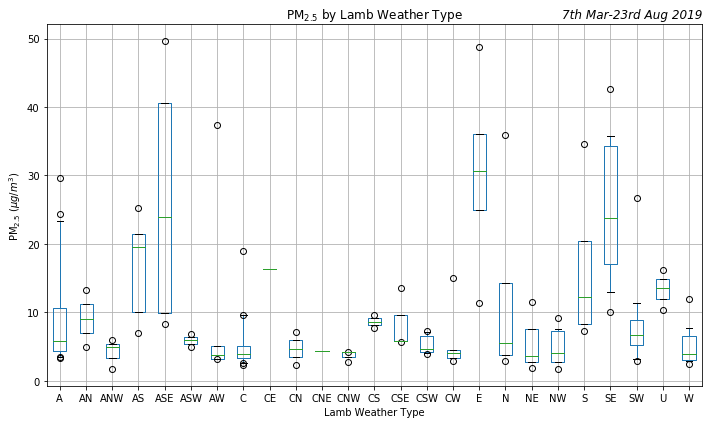

In [12]:
merged.boxplot(by='LWT', whis=[5, 95], figsize=(10, 6))
#plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ by Lamb Weather Type')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Lamb Weather Type')
plt.tight_layout()
plt.savefig('graphs/BoxplotLWTs.png', dpi=300)

In [13]:
merged['Gross_LWT'] = merged.LWT.str.get(0)

In [14]:
def replace_func(x):
    if x == 'A':
        return 'Anticyclonic'
    elif x == 'C':
        return 'Cyclonic'
    else:
        return 'Neither'

In [15]:
merged['Gross_LWT'] = merged['Gross_LWT'].apply(replace_func)

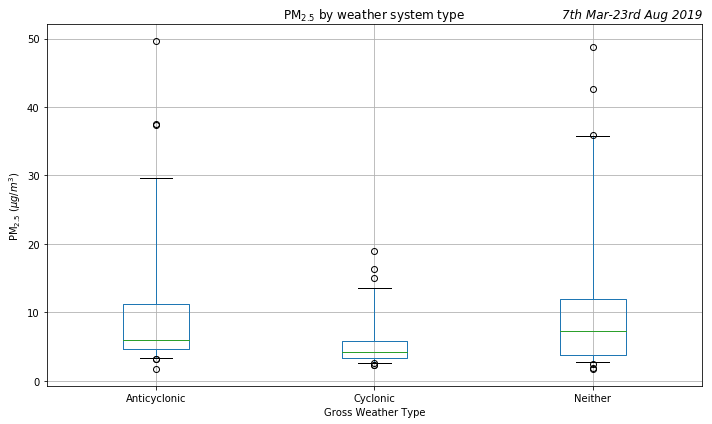

In [16]:
merged.boxplot(by='Gross_LWT', whis=[5, 95], figsize=(10, 6))
#plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.suptitle('')
plt.title('$\mathrm{PM}_{2.5}$ by weather system type')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.title('7th Mar-23rd Aug 2019', loc='right', fontstyle='italic')
plt.xlabel('Gross Weather Type')
plt.tight_layout()
plt.savefig('graphs/BoxplotGrossLWTs.png', dpi=300)